## Example for statistical downscaling in a cross-validation approach

(using reanalysis predictors)

In [1]:
rm(list=ls())
library(loadeR)
library(transformeR)
library(downscaleR)
library(visualizeR)

Loading required package: rJava

Loading required package: loadeR.java

Java version 23x amd64 by N/A detected

The maximum JVM heap space available is: 2.00 GB

NetCDF Java Library Version: 4.6.0-SNAPSHOT (Built-On: 20150423.1338) loaded and ready

You can manually set the NetCDF Java Library version before loading the package:
options(loadeR.java_forced_version = "X.Y.Z")
library(loadeR.java)

netCDF-Java CLASSPATH from bundled java package directory: /home/ana/micromamba/envs/prosecco/lib/R/library/loadeR.java/java:/home/ana/micromamba/envs/prosecco/lib/R/library/loadeR.java/java/netcdfAll-4.6.0-SNAPSHOT.jar

Loading required package: climate4R.UDG

climate4R.UDG version 0.2.6 (2023-06-26) is loaded

Please use 'citation("climate4R.UDG")' to cite this package.

loadeR version 1.8.4 (2025-08-07) is loaded

Please use 'citation("loadeR")' to cite this package.




    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.2.2 (2023-10-26) is loaded


Get the latest stable version (2.2.5) using <devtools::install_github('SantanderMetGroup/transformeR')>

Please see 'citation("transformeR")' to cite this package.

downscaleR version 3.3.4 (2023-06-22) is loaded

Please use 'citation("downscaleR")' to cite this package.

visualizeR version 1.6.4 (2023-10-26) is loaded

Please see 'citation("visualizeR")' to cite this package.



In [2]:
library(lattice) # since I have to use some functionalities of spplot directly 
library(sp) # bpy.colors
library(RColorBrewer) # color themes

In [3]:
work.dir <- "/home/ana/WORK_local/DATA/Prosecco/data4notebooks/"

In [4]:
# provinces polygon
sh <- readRDS(paste0(work.dir,"italy_admin.rds")) # read shape file
proj4string(sh) = CRS("+init=epsg:4326")
sh = as(sh, "SpatialPolygons")

# plot limits
lats <- c(45.45,46.15)
lons <- c(11.7,12.8)

Warning message in `proj4string<-`(`*tmp*`, value = new("CRS", projargs = "+init=epsg:4326")):
“A new CRS was assigned to an object with an existing CRS:
+proj=longlat +datum=WGS84 +no_defs
without reprojecting.
For reprojection, use function spTransform”


## Load predictands

In [5]:
# *** load observations *** 
load(paste0(work.dir,"/observations_subset_1991-2020.Rdata"))


[2026-02-21 18:16:45.886894] - Computing climatology...

[2026-02-21 18:16:45.895541] - Done.



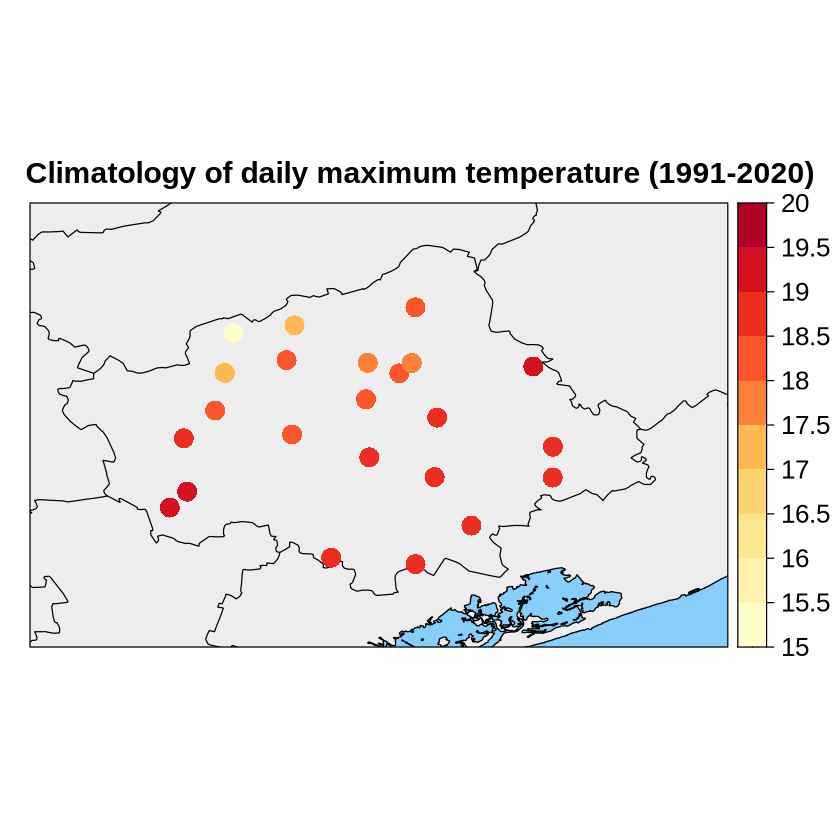

In [6]:
bk <-  seq(15,20,0.5)
cmap.nbins <- length(bk)  # number of bins in colorbar
cols <- colorRampPalette(brewer.pal(8,"YlOrRd"))
cmap <- cols(cmap.nbins)
spatialPlot(climatology(tasmax_obs), cex=2, xlim=lons, ylim=lats,
    backdrop.theme = "none",  sp.layout = list(sh, col = "black", fill="grey93"),
    par.settings = list(panel.background=list(col="lightskyblue")), 
    col.regions = cmap, set.min = min(bk), set.max = max(bk),
    cuts = bk, main = list(label="Climatology of daily maximum temperature (1991-2020)", cex=1.5),
    par.strip.text = list(cex = 1),
    colorkey = list(right = list(fun = draw.colorkey, args = list(key = list(at =bk, col = cmap, labels = list(at = bk,cex=1.3,labels = bk))))))

[2026-02-21 18:16:46.902879] - Computing climatology...

[2026-02-21 18:16:46.905988] - Done.



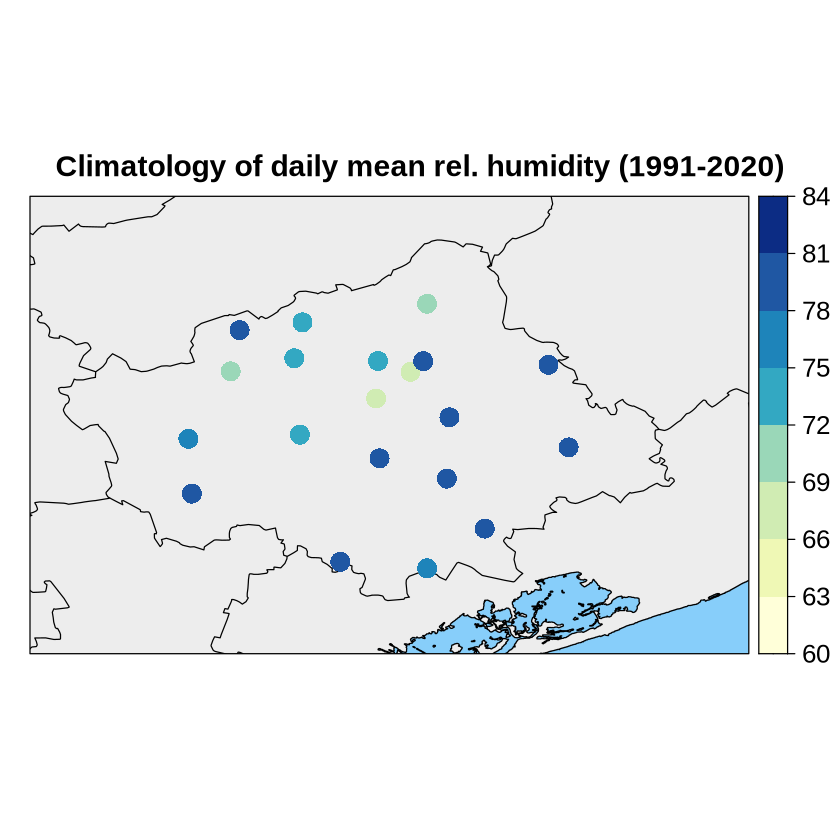

In [7]:
bk <-  seq(60,84,3)
cmap.nbins <- length(bk)  # number of bins in colorbar
cols <- colorRampPalette(brewer.pal(8,"YlGnBu"))
cmap <- cols(cmap.nbins)
spatialPlot(climatology(hurs_obs), cex=2, xlim=lons, ylim=lats,
    backdrop.theme = "none",  sp.layout = list(sh, col = "black", fill="grey93"),
    par.settings = list(panel.background=list(col="lightskyblue")), 
    col.regions = cmap, set.min = min(bk), set.max = max(bk),
    cuts = bk,  main = list(label="Climatology of daily mean rel. humidity (1991-2020)", cex=1.5),
    par.strip.text = list(cex = 1),
    colorkey = list(right = list( fun = draw.colorkey, args = list(key = list(at =bk, col = cmap, labels = list(at = bk,cex=1.3,labels = bk))))))

## Load predictors

In [8]:
# *** load predictors (already retrieved and upscaled fromm 0.25º to 2º with updacledGrid times=8) ***
load(paste0(work.dir,"/ERA5_P8predictors_2deg_1991-2020.Rdata"))

In [9]:
getVarNames(x)
attr(x$Variable, "units")

[1] "u@500" "u@700" "u@850" "v@500" "v@700" "v@850" "z@500" "z@850" "t@500"
[10] "t@700" "t@850" "q@500" "q@850" "t2m"

[1] "m s**-1"    "m s**-1"    "m s**-1"    "m s**-1"    "m s**-1"   
 [6] "m s**-1"    "m**2 s**-2" "m**2 s**-2" "K"          "K"         
[11] "K"          "kg kg**-1"  "kg kg**-1"  "K"

[2026-02-21 18:16:47.74097] - Computing climatology...

[2026-02-21 18:16:47.894777] - Done.



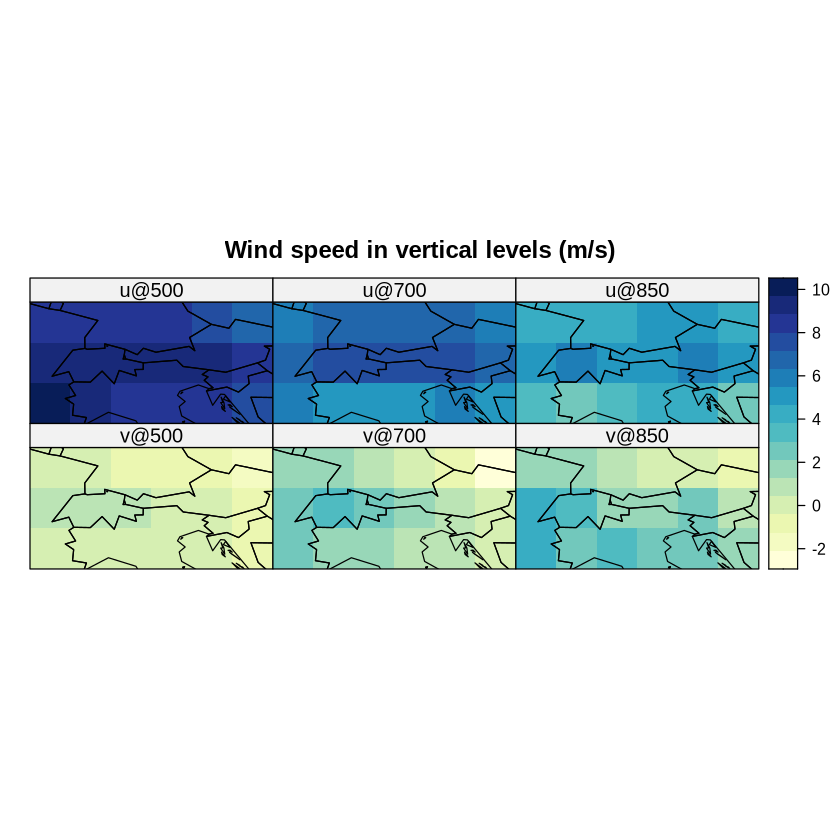

In [10]:
x_clim <- climatology(x)
spatialPlot(bindGrid(subsetGrid(x_clim, var= "u@500"), subsetGrid(x_clim, var= "u@700"), subsetGrid(x_clim, var= "u@850"), 
    subsetGrid(x_clim, var= "v@500"), subsetGrid(x_clim, var= "v@700"), subsetGrid(x_clim, var= "v@850")), 
    backdrop.theme = "countries", as.table=TRUE, names.attr=getVarNames(x)[1:6], layout= c(3,2), color.theme = "YlGnBu",
    main= "Wind speed in vertical levels (m/s)")

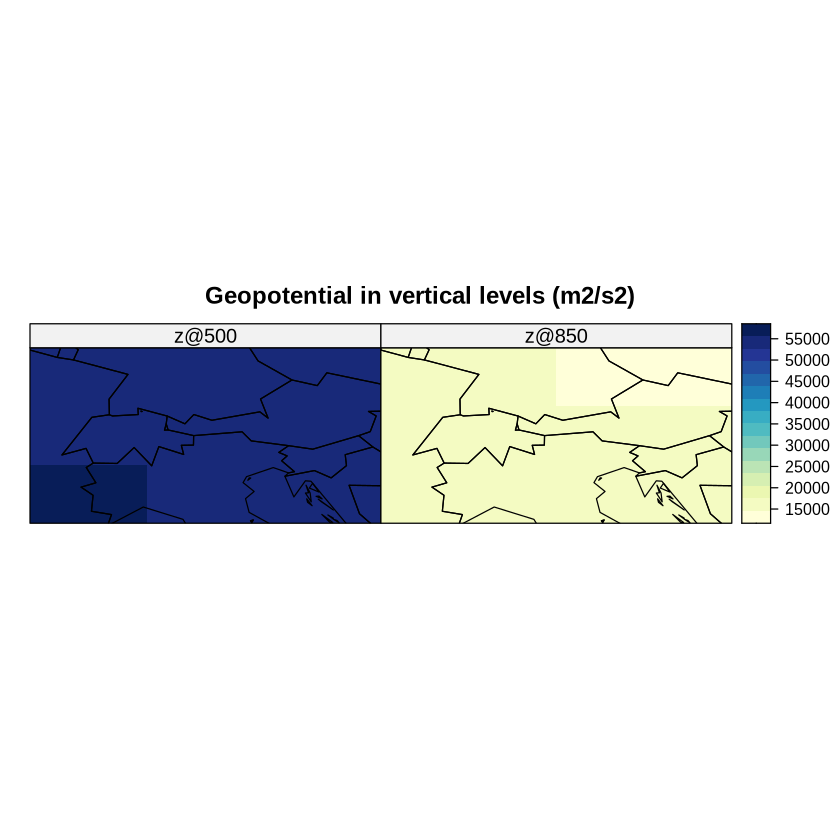

In [11]:
spatialPlot(bindGrid(subsetGrid(x_clim, var= "z@500"), subsetGrid(x_clim, var= "z@850")), 
    backdrop.theme = "countries", as.table=TRUE, names.attr=getVarNames(x)[7:8], layout= c(2,1), color.theme = "YlGnBu",
    main= "Geopotential in vertical levels (m2/s2)")

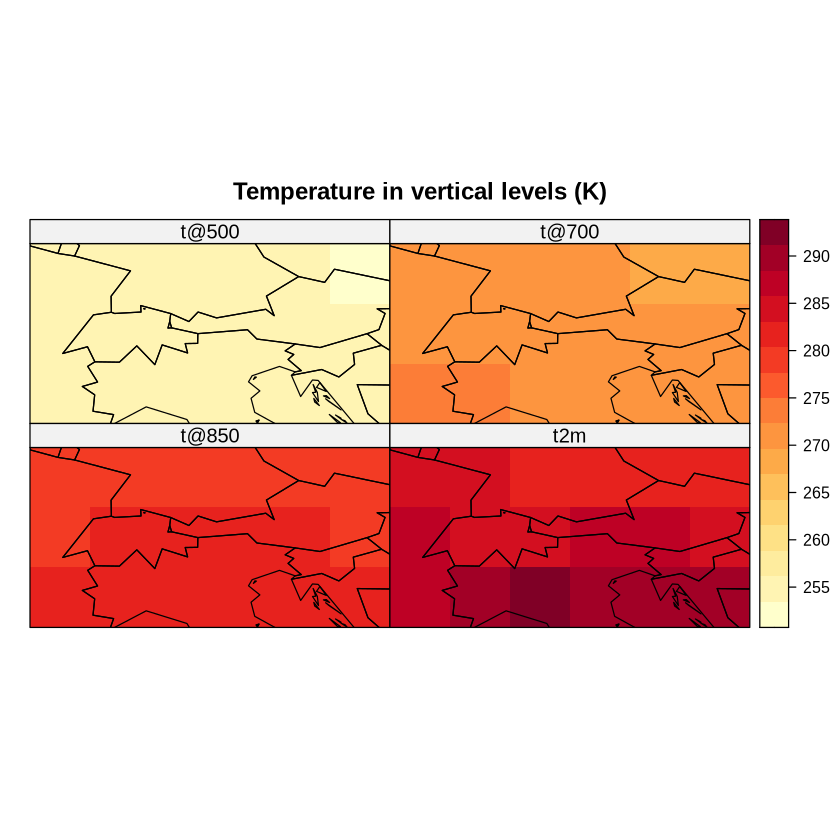

In [12]:
spatialPlot(bindGrid(subsetGrid(x_clim, var= "t@500"), subsetGrid(x_clim, var= "t@700"), subsetGrid(x_clim, var= "t@850"), subsetGrid(x_clim, var= "t2m")), 
    backdrop.theme = "countries", as.table=TRUE, names.attr=c(getVarNames(x)[9:11],"t2m"), layout= c(2,2), color.theme = "YlOrRd",
    main= "Temperature in vertical levels (K)")

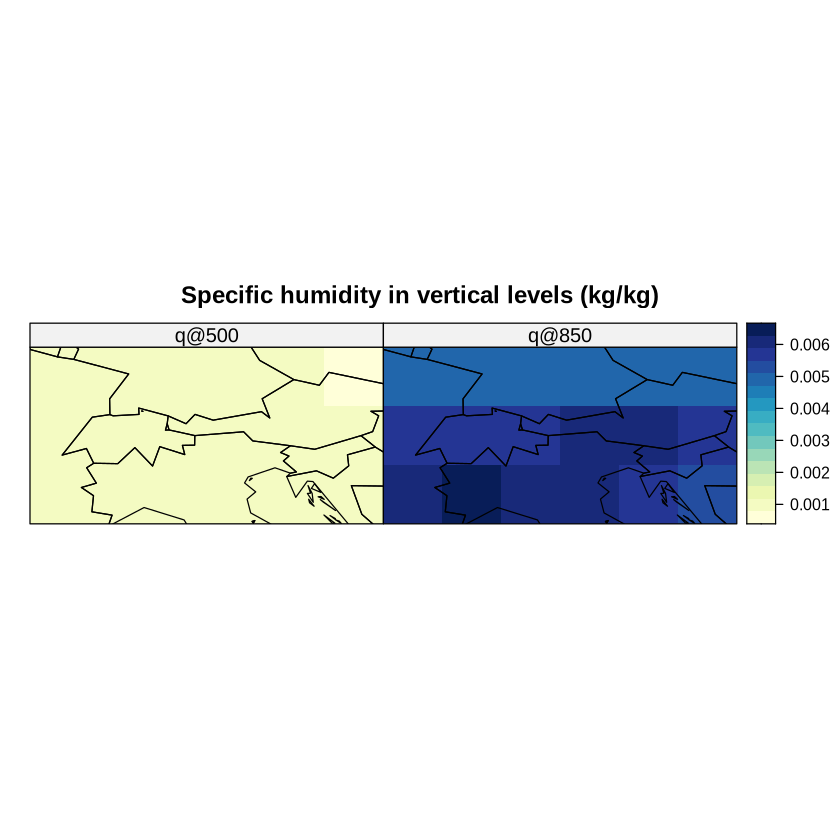

In [13]:
spatialPlot(bindGrid(subsetGrid(x_clim, var= "q@500"), subsetGrid(x_clim, var= "q@850")), 
    backdrop.theme = "countries", as.table=TRUE, names.attr=getVarNames(x)[12:13], layout= c(2,1), color.theme = "YlGnBu",
    main= "Specific humidity in vertical levels (kg/kg)")

## Downscaling using cross-validation

In [14]:
nfold <- 5

In [15]:
# for precipitation and relative humidity
pr_pred <- downscaleCV(x, pr_obs, folds = nfold, sampling.strategy = "kfold.random",
                        scaleGrid.args = list(type = "standardize"),
                        method = "analogs", 
                        prepareData.args = list("spatial.predictors" = list(which.combine = getVarNames(x), v.exp = 0.95)))


fold: 1 --> calculating...

[2026-02-21 18:17:11.268756] - Scaling ...

[2026-02-21 18:17:11.557036] - Done

[2026-02-21 18:17:11.558463] - Scaling ...

[2026-02-21 18:17:12.248155] - Done

[2026-02-21 18:17:12.652588] Performing PC analysis on 14 variables plus a combination ...

[2026-02-21 18:17:13.475232] Done.

fold: 2 --> calculating...

[2026-02-21 18:17:27.076315] - Scaling ...

[2026-02-21 18:17:27.198468] - Done

[2026-02-21 18:17:27.199671] - Scaling ...

[2026-02-21 18:17:27.595287] - Done

[2026-02-21 18:17:27.845052] Performing PC analysis on 14 variables plus a combination ...

[2026-02-21 18:17:28.321677] Done.

fold: 3 --> calculating...

[2026-02-21 18:17:40.481809] - Scaling ...

[2026-02-21 18:17:40.622266] - Done

[2026-02-21 18:17:40.623589] - Scaling ...

[2026-02-21 18:17:41.026946] - Done

[2026-02-21 18:17:41.300949] Performing PC analysis on 14 variables plus a combination ...

[2026-02-21 18:17:41.722847] Done.

fold: 4 --> calculating...

[2026-02-21 18:17:

Evaluate predictions for precipitation:

[2026-02-21 18:18:19.526767] - Computing climatology...

[2026-02-21 18:18:19.530349] - Done.

[2026-02-21 18:18:19.535644] - Computing climatology...

[2026-02-21 18:18:19.538763] - Done.



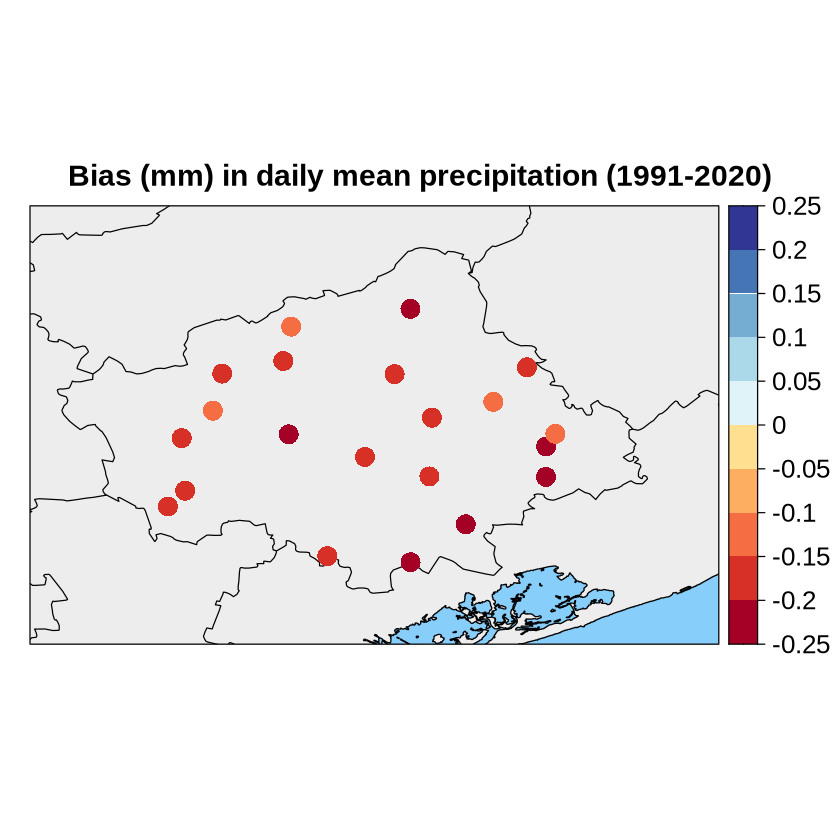

In [16]:
# bias and correlation
bias <- gridArithmetics(climatology(pr_pred), climatology(pr_obs), operator = "-")
bk <- seq(-0.25, 0.25, 0.05)
cmap.nbins <- length(bk)  # number of bins in colorbar
cols <- colorRampPalette(brewer.pal(11,"RdYlBu"))
cmap <- cols(cmap.nbins)
spatialPlot(bias, cex=2, xlim=lons, ylim=lats,
    backdrop.theme = "none",  sp.layout = list(sh, col = "black", fill="grey93"),
    par.settings = list(panel.background=list(col="lightskyblue")), 
    col.regions = cmap, set.min = min(bk), set.max = max(bk),
    cuts = bk,  main = list(label="Bias (mm) in daily mean precipitation (1991-2020)", cex=1.5),
    par.strip.text = list(cex = 1),
    colorkey = list(right = list( fun = draw.colorkey, args = list(key = list(at =bk, col = cmap, labels = list(at = bk,cex=1.3,labels = bk))))))

Focus on accumulated precipitation in one month and calculate relative bias:

In [17]:
pr_pred_jul <- subsetGrid(pr_pred, season=7)
pr_obs_jul <- subsetGrid(pr_obs, season=7)

In [18]:
pr_pred_jul_agg <- aggregateGrid(pr_pred_jul, aggr.m = list(FUN = sum, na.rm = TRUE))
pr_obs_jul_agg <- aggregateGrid(pr_obs_jul, aggr.m = list(FUN = sum, na.rm = TRUE))


[2026-02-21 18:18:19.97229] Performing monthly aggregation...

[2026-02-21 18:18:19.974545] Done.

[2026-02-21 18:18:19.977108] Performing monthly aggregation...

[2026-02-21 18:18:19.979219] Done.



[2026-02-21 18:18:19.994686] - Computing climatology...

[2026-02-21 18:18:19.996063] - Done.

[2026-02-21 18:18:19.998416] - Computing climatology...

[2026-02-21 18:18:19.999421] - Done.

[2026-02-21 18:18:20.001283] - Computing climatology...

[2026-02-21 18:18:20.002195] - Done.



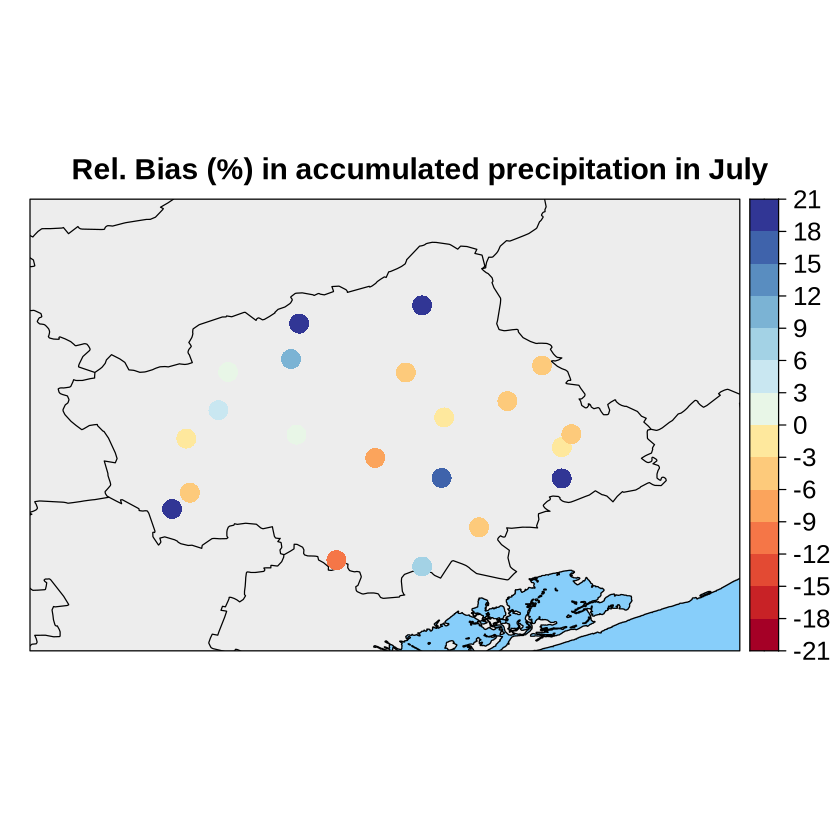

In [19]:
bias_rel <- gridArithmetics(climatology(pr_pred_jul_agg), climatology(pr_obs_jul_agg), climatology(pr_obs_jul_agg), 100, operator=c("-", "/", "*"))
bk <- seq(-21, 21, 3)
cmap.nbins <- length(bk)  # number of bins in colorbar
cols <- colorRampPalette(brewer.pal(11,"RdYlBu"))
cmap <- cols(cmap.nbins)
spatialPlot(bias_rel, cex=2, xlim=lons, ylim=lats,
    backdrop.theme = "none",  sp.layout = list(sh, col = "black", fill="grey93"),
    par.settings = list(panel.background=list(col="lightskyblue")), 
    col.regions = cmap, set.min = min(bk), set.max = max(bk),
    cuts = bk,  main = list(label="Rel. Bias (%) in accumulated precipitation in July", cex=1.5),
    par.strip.text = list(cex = 1),
    colorkey = list(right = list( fun = draw.colorkey, args = list(key = list(at =bk, col = cmap, labels = list(at = bk,cex=1.3,labels = bk))))))
  

Temporal correlation:

In [20]:
correlation <- bias # only to create a C4R object to fill with correlation values
for(i in 1:dim(pr_pred$Data)[2]){
    corr.aux <- cor(pr_pred$Data[,i], pr_obs$Data[,i], use="complete.obs", method = "spearman")
    correlation$Data[,i] <- corr.aux
    rm(corr.aux)
}

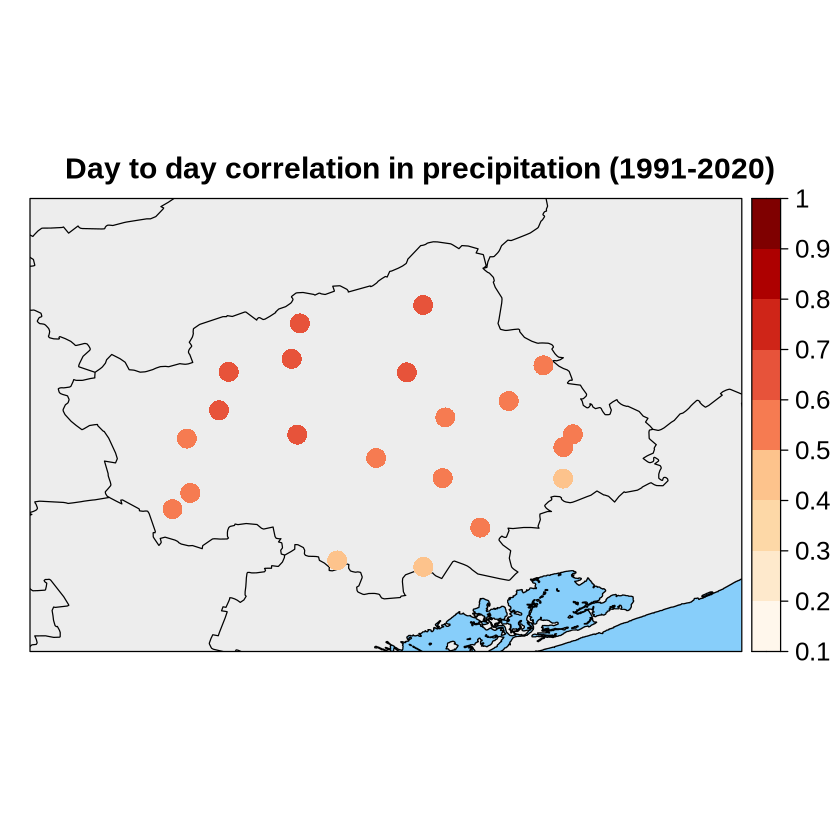

In [21]:
bk <- seq(0.1,1, 0.1)
cmap.nbins <- length(bk)  # number of bins in colorbar
cols <- colorRampPalette(brewer.pal(9,"OrRd"))
cmap <- cols(cmap.nbins)
spatialPlot(correlation, cex=2, xlim=lons, ylim=lats,
    backdrop.theme = "none",  sp.layout = list(sh, col = "black", fill="grey93"),
    par.settings = list(panel.background=list(col="lightskyblue")),
                        col.regions = cmap, set.min = min(bk), set.max = max(bk),
                        cuts = bk, main = list(label="Day to day correlation in precipitation (1991-2020)", cex=1.5),
                        par.strip.text = list(cex = 1),
                        colorkey = list(right = list( fun = draw.colorkey, args = list(key = list(at =bk, col = cmap, labels = list(at = bk,cex=1.3,labels = bk))))))

In [22]:
# for temperatures
tasmax_pred <- downscaleCV(x, tasmax_obs, folds = nfold, sampling.strategy = "kfold.random",
                        scaleGrid.args = list(type = "standardize"),
                        method = "GLM", family = gaussian(link = "identity"),
                        prepareData.args = list("spatial.predictors" = list(which.combine = 
                        getVarNames(x), v.exp = 0.95)))

fold: 1 --> calculating...

[2026-02-21 18:18:21.201727] - Scaling ...

[2026-02-21 18:18:21.350982] - Done

[2026-02-21 18:18:21.352275] - Scaling ...

[2026-02-21 18:18:21.775252] - Done

[2026-02-21 18:18:22.041258] Performing PC analysis on 14 variables plus a combination ...

[2026-02-21 18:18:23.091258] Done.

fold: 2 --> calculating...

[2026-02-21 18:18:23.459632] - Scaling ...

[2026-02-21 18:18:23.58734] - Done

[2026-02-21 18:18:23.588644] - Scaling ...

[2026-02-21 18:18:24.002059] - Done

[2026-02-21 18:18:24.267754] Performing PC analysis on 14 variables plus a combination ...

[2026-02-21 18:18:24.595352] Done.

fold: 3 --> calculating...

[2026-02-21 18:18:24.928669] - Scaling ...

[2026-02-21 18:18:25.068741] - Done

[2026-02-21 18:18:25.070112] - Scaling ...

[2026-02-21 18:18:25.458464] - Done

[2026-02-21 18:18:25.742332] Performing PC analysis on 14 variables plus a combination ...

[2026-02-21 18:18:26.420342] Done.

fold: 4 --> calculating...

[2026-02-21 18:18:2

Evaluate predictions:

In [23]:
tasmax_pred_jul <- subsetGrid(tasmax_pred, season=7)
tasmax_obs_jul <- subsetGrid(tasmax_obs, season=7)

[2026-02-21 18:18:30.253813] - Computing climatology...

[2026-02-21 18:18:30.255508] - Done.

[2026-02-21 18:18:30.258221] - Computing climatology...

[2026-02-21 18:18:30.25984] - Done.



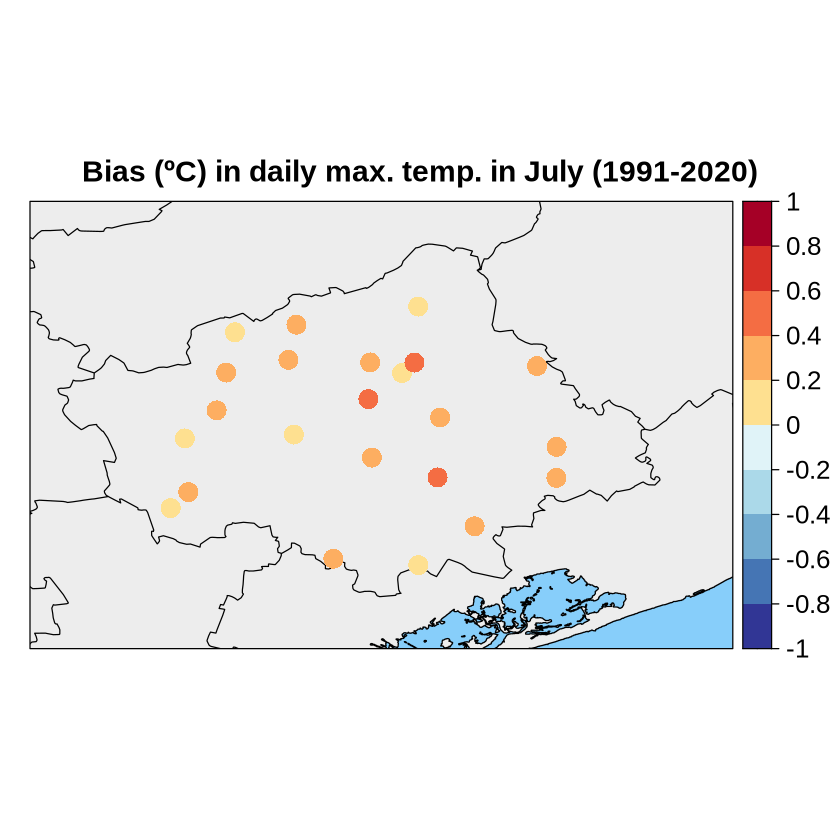

In [24]:
bias <- gridArithmetics(climatology(tasmax_pred_jul), climatology(tasmax_obs_jul), operator = "-")
bk <- seq(-1, 1, 0.2) 
cmap.nbins <- length(bk)  # number of bins in colorbar
cols <- colorRampPalette(brewer.pal(11,"RdYlBu"))
cmap <- rev(cols(cmap.nbins))
spatialPlot(bias, cex=2, xlim=lons, ylim=lats,
    backdrop.theme = "none",  sp.layout = list(sh, col = "black", fill="grey93"),
    par.settings = list(panel.background=list(col="lightskyblue")), 
    col.regions = cmap, set.min = min(bk), set.max = max(bk), 
    cuts = bk,  main = list(label="Bias (ºC) in daily max. temp. in July (1991-2020)", cex=1.5),
    par.strip.text = list(cex = 1),
    colorkey = list(right = list( fun = draw.colorkey, args = list(key = list(at =bk, col = cmap, labels = list(at = bk,cex=1.3,labels = bk))))))

In [25]:
correlation <- bias # only to create a C4R object to fill with correlation values
for(i in 1:dim(tasmax_pred$Data)[2]){
    corr.aux <- cor(tasmax_pred$Data[,i], tasmax_obs$Data[,i], use="complete.obs", method = "pearson")
    correlation$Data[,i] <- corr.aux
    rm(corr.aux)
}

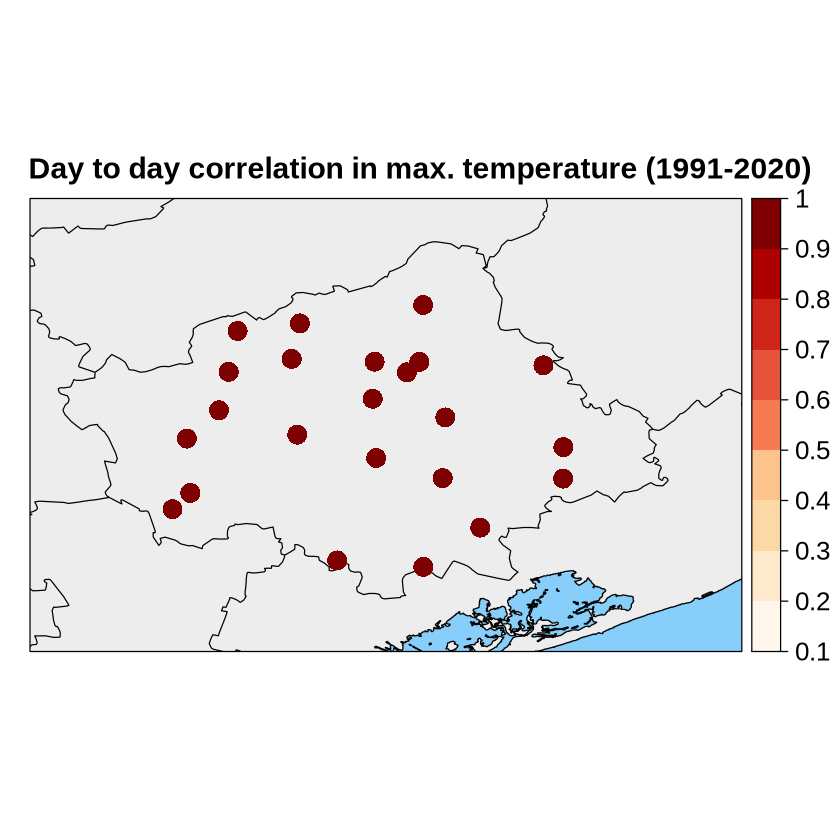

In [26]:
bk <- seq(0.1,1, 0.1)
cmap.nbins <- length(bk)  # number of bins in colorbar
cols <- colorRampPalette(brewer.pal(9,"OrRd"))
cmap <- cols(cmap.nbins)
spatialPlot(correlation, cex=2, xlim=lons, ylim=lats,
    backdrop.theme = "none",  sp.layout = list(sh, col = "black", fill="grey93"),
    par.settings = list(panel.background=list(col="lightskyblue")),
                        col.regions = cmap, set.min = min(bk), set.max = max(bk),
                        cuts = bk, main = list(label="Day to day correlation in max. temperature (1991-2020)", cex=1.5),
                        par.strip.text = list(cex = 1),
                        colorkey = list(right = list( fun = draw.colorkey, args = list(key = list(at =bk, col = cmap, labels = list(at = bk,cex=1.3,labels = bk))))))